# Automated web scraping strategy for autocarindia website

## Importing libraries and Variable Initialization

In [1]:
import requests
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns


vehicle_names = [];
vehicle_prices = [];
vehicle_ratings = [];
vehicle_engines = [];
vehicle_torque_nm = [];
vehicle_torque_rpm = [];
vehicle_kerb_weights = [];
vehicle_mileages = [];

## for loop for Web Scraping

In [2]:
for i in range(1,5):
    html_code = requests.get('https://www.autocarindia.com/bikes/bikes-under-2-lakhs/' + str(i)).text
    page = BeautifulSoup(html_code, 'html.parser')

    vehicle_sections = page.find_all(class_='car-lis-sec')
    vehicle_sections

    for vehicle_section in vehicle_sections:

        name = vehicle_section.select_one(".heading-h4")
        if name:
            name = name.get_text()
        else:
            name = ''        
        vehicle_names.append(name)

        price = vehicle_section.select_one(".price-model")
        if price:
            price = price.get_text().replace("₹", "")
        else:
            price = ''
        
        if("-" in price):
            
            price_left = price.split("-")[0].replace(",", "").strip()
            price_right = price.split("-")[1].replace(",", "").strip()
            
            if " lakh" in price_left:
                price_left = price_left.replace(" lakh", "").strip()
                price_left = float(price_left) * 100000 
                
            if " lakh" in price_right:
                price_right = price_right.replace(" lakh", "").strip()
                price_right = float(price_right) * 100000
            
            price_left = float(price_left)
            price_right = float(price_right)
            
            price = (price_left + price_right) / 2
        else:
            if " lakh" in price:
                price = price.replace(" lakh", "").strip()
                price = float(price) * 100000 
            price = float(str(price).replace(",", "").strip())
            
        vehicle_prices.append(price)

        rating = vehicle_section.select_one(".autocar-rating")
        if(rating):
            vehicle_ratings.append(rating.get_text().split('(')[1].split('/')[0].strip())
        else:
            vehicle_ratings.append(np.NAN)

        infos = vehicle_section.find_all(class_="car-dis-sec")

        engine = infos[0].find_all("p")[1].get_text().strip()
        if(engine == "BLDC"):
            engine = np.NAN
        else:    
            engine = engine.replace("cc", "")
        if "-" in str(engine):
            engine_left = engine.split("-")[0].strip()
            engine_right = engine.split("-")[1].strip()
            engine = (float(engine_left) + float(engine_right)) / 2
        elif "NA" not in str(engine):
            engine = float(engine)
        else:
            engine = np.NAN
            
        vehicle_engines.append(engine)

        torque = infos[1].find_all("p")[1].get_text()
        parts = torque.split('@')
        
        nm = np.NAN
        rpm = np.NAN
        if len(parts) == 2:
            nm = parts[0].replace("Nm", "").replace(",", "").strip()
            rpm = parts[1].replace("rpm", "").replace(",", "").strip()
        else:
            parts = torque.split('at')
            if len(parts) == 2:
                nm = parts[0].replace("Nm", "").replace(",", "").strip()
                rpm = parts[1].replace("rpm", "").replace(",", "").strip()
        
        if not str(nm).isdigit():
            nm = np.NAN
        if not str(rpm).isdigit():
            rpm = np.NAN
        
        vehicle_torque_nm.append(nm)
        vehicle_torque_rpm.append(rpm)
        
        kerb_weight = infos[2].find_all("p")[1].get_text()
        kerb_weight = kerb_weight.replace("kg", "").strip()
        
        if "-" in kerb_weight:
            kerb_weight_left = kerb_weight.split("-")[0].strip()
            kerb_weight_right = kerb_weight.split("-")[1].strip()
            kerb_weight = (float(kerb_weight_left) + float(kerb_weight_right)) / 2
        
        kerb_weight = int(kerb_weight)
        vehicle_kerb_weights.append(kerb_weight)

        vehicle_mileages.append(infos[3].find_all("p")[1].get_text())

##  aggregate the data into a dictionary and then converted into a DataFrame

In [3]:
vehicle_data = {'name': vehicle_names, 'price(₹)': vehicle_prices, 'rating': vehicle_ratings, 'engine (cc)': vehicle_engines, 'torque_nm': vehicle_torque_nm, 'torque_rpm': vehicle_torque_rpm, 'kerb_weight(kg)': vehicle_kerb_weights, 'mileage': vehicle_mileages}
vehicle_df = pd.DataFrame(vehicle_data)
vehicle_df

,name,price(₹),rating,engine (cc),torque_nm,torque_rpm,kerb_weight(kg),mileage
0,TVS XL 100 Comfort,49584.000,7,99.70,NaN,3500,88,NA
1,Joy E-bike Honeybee,52456.000,NaN,NaN,NaN,NaN,35,40km
2,Hero MotoCorp HF Deluxe,65537.500,NaN,97.20,NaN,6000,112,NA
3,TVS XL 100 Heavy Duty,66501.000,7,99.70,NaN,3500,89,55kpl
4,TVS Sport,72231.000,NaN,109.70,NaN,4500,111,75kpl
5,Hero MotoCorp Pleasure+,69566.000,7,110.90,NaN,5500,104,NA
6,Hero MotoCorp HF Deluxe i3s,71414.000,NaN,97.20,NaN,6000,112,NA
7,Gemopai Ryder,72800.000,NaN,NaN,NaN,NaN,80,90km
8,TVS Radeon,77262.500,8,109.70,NaN,4500,117,NA
9,Hero MotoCorp Splendor Plus,80803.500,NaN,NaN,NaN,NaN,111,NA


In [4]:
# Checking for empty cells
print("vehicle_df Dataset has",vehicle_df.isnull().values.sum(), "missing values")

vehicle_df Dataset has 82 missing values


## Summary Statistics

In [5]:
vehicle_df.describe()

,price(₹),engine (cc),kerb_weight(kg)
count,40.000000,35.000000,40.000000
mean,81647.992875,118.058571,111.825000
std,18109.850184,14.733698,22.096394
min,49584.000000,97.200000,35.000000
25%,70952.000000,109.605000,105.500000
50%,82630.500000,124.000000,115.000000
75%,90237.375000,124.525000,122.000000
max,125000.000000,160.000000,156.000000


- Price: The average price of the vehicles in the dataset is ₹81,647.99, with a standard deviation of ₹18,109.85. The price range varies significantly, from ₹49,584 to ₹125,000.
- Rating: The average rating is 7.57, on a scale of 10.
- Engine Size (cc): The engine sizes range from 97.2 cc to 160 cc, with an average size of 118.06 cc.
- Torque: The average torque is 10.6 Nm, with a range from 10 Nm to 11 Nm. 
- Torque RPM: The average Torque RPM is around 5403, with a range from 3500 RPM to 7000 RPM.
- Kerb Weight: The average kerb weight is 111.83 kg, ranging from 35 kg to 156 kg.

In [6]:
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             40 non-null     object 
 1   price(₹)         40 non-null     float64
 2   rating           7 non-null      object 
 3   engine (cc)      35 non-null     float64
 4   torque_nm        5 non-null      object 
 5   torque_rpm       31 non-null     object 
 6   kerb_weight(kg)  40 non-null     int64  
 7   mileage          40 non-null     object 
dtypes: float64(2), int64(1), object(5)
memory usage: 2.6+ KB


- The data was collected by autocarindia recording the information about bikes under 2 lakhs. 40 observations and 8 variables

## Univariate analysis

<AxesSubplot:xlabel='price(₹)', ylabel='Count'>

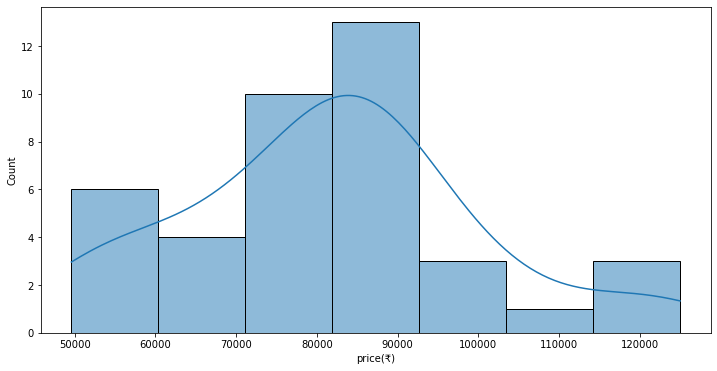

In [7]:
plt.figure(figsize=(12, 6))
sns.histplot(vehicle_df['price(₹)'], bins=7, kde=True)

- This plot shows the distribution of the prices of the vehicles. It appears to be slightly right-skewed, indicating a concentration of vehicles in the lower price range with some outliers.

<AxesSubplot:xlabel='engine (cc)', ylabel='Count'>

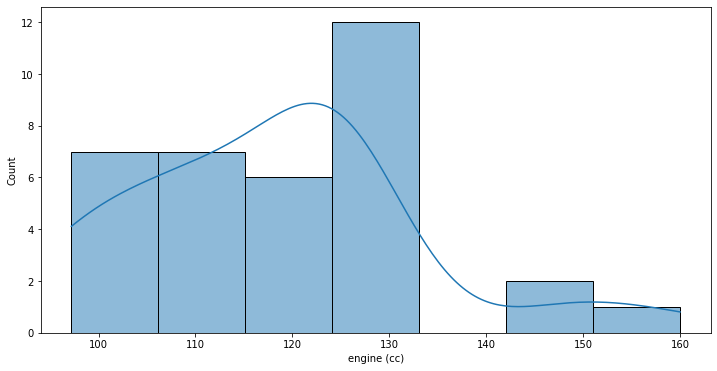

In [8]:
plt.figure(figsize=(12, 6))
sns.histplot(vehicle_df['engine (cc)'], bins=7, kde=True)

- This histogram shows the distribution of engine capacities (in cc). 
- The distribution is relatively spread out, with most values clustered around the middle range.

<AxesSubplot:xlabel='kerb_weight(kg)', ylabel='Count'>

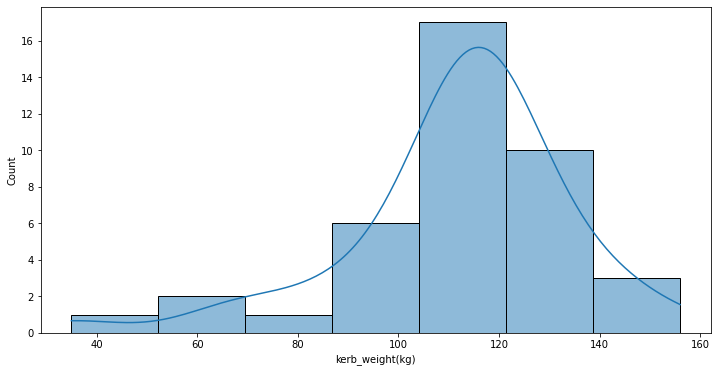

In [9]:
plt.figure(figsize=(12, 6))
sns.histplot(vehicle_df['kerb_weight(kg)'], bins=7, kde=True)

- The distribution of kerb weight is uniform, with a slight concentration in the middle range.

<AxesSubplot:xlabel='rating', ylabel='Count'>

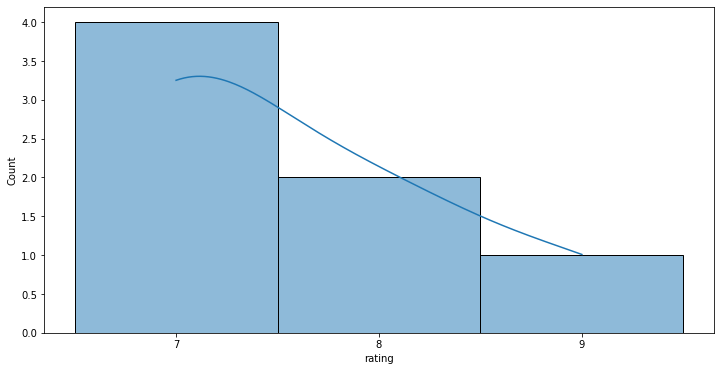

In [10]:
plt.figure(figsize=(12, 6))
sns.histplot(vehicle_df['rating'], bins=7, kde=True)

- Due to many missing values the rating distribution is not so informative. 
- it shows that among the ratings available, they are mostly concentrated around 7 and 8.

## Bivariate analysis

In [11]:
def makeScatterPlot(variable_1, variable_2):
    plt.scatter(vehicle_df[variable_1], vehicle_df[variable_2])
    plt.title('Scatter Plot between ' + variable_1 + ' and ' + variable_2)
    plt.xlabel(variable_1)
    plt.ylabel(variable_2)
    plt.show()

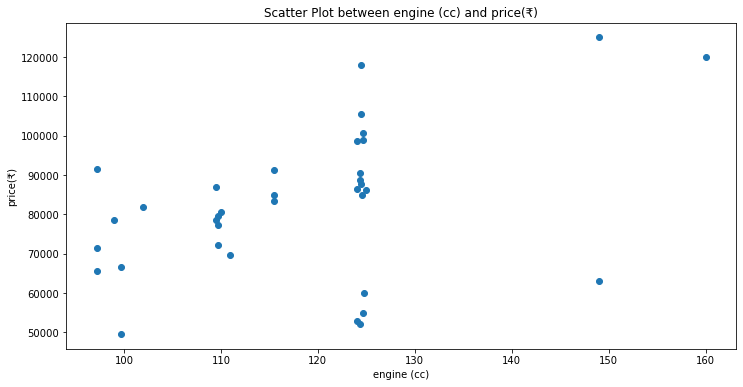

In [12]:
plt.figure(figsize=(12, 6))
makeScatterPlot('engine (cc)', 'price(₹)')

- The scatter plot does not indicate a strong linear relationship between engine capacity and price.

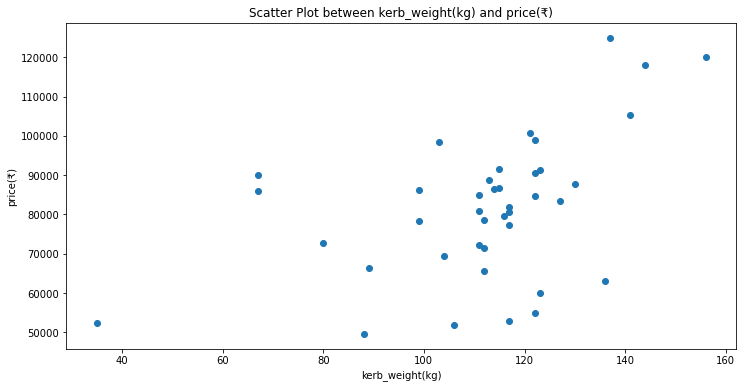

In [13]:
plt.figure(figsize=(12, 6))
makeScatterPlot('kerb_weight(kg)', 'price(₹)')

- Similar to engine capacity, there's no strong linear correlation between the kerb weight of the vehicles and their prices. 

Text(0.5, 1.0, 'Price Distribution by Rating')

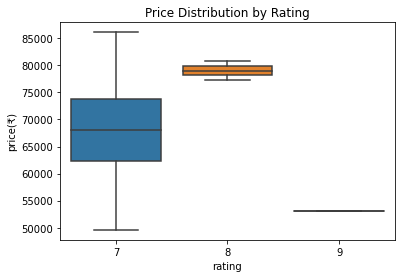

In [14]:
# Boxplot for price by rating
sns.boxplot(x='rating', y='price(₹)', data=vehicle_df)
plt.title('Price Distribution by Rating')

- This plot shows the range of prices for each rating category. It helps identify how prices vary with different ratings.

Text(0.5, 1.0, 'Average Price by Rating')

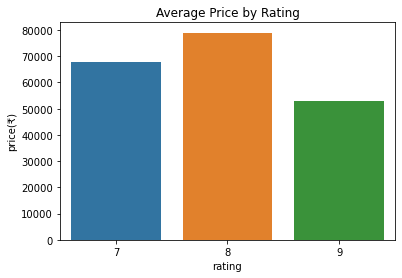

In [15]:
# Bar Plot for average price by rating
avg_price_by_rating = vehicle_df.groupby('rating')['price(₹)'].mean().reset_index()
sns.barplot(x='rating', y='price(₹)', data=avg_price_by_rating)
plt.title('Average Price by Rating')

- This plot presents the average price of vehicles for each rating category. 

## Multivariate analysis

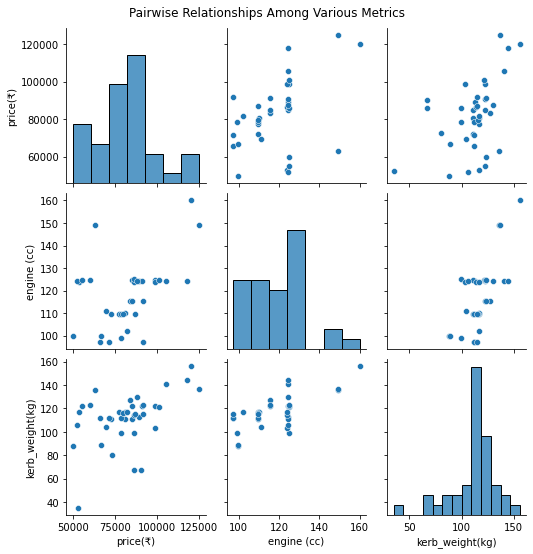

In [16]:
# Pair plot
sns.pairplot(vehicle_df)
plt.suptitle('Pairwise Relationships Among Various Metrics', y=1.02)
plt.show()

- The pairplot provides insights into the relationships between price, engine capacity, and kerb weight, as well as the distributions of each variable: